In [1]:
# d'après https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
plt.style.use(['ggplot'])

# Create Data

<h5> Generate some data :

In [3]:
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

Let's plot our data to check the relation between X and Y

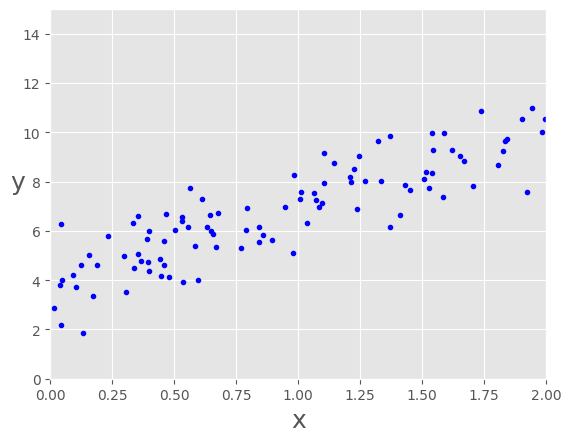

In [4]:
plt.plot(X,y,'b.')
plt.xlabel("x", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

#  Analytical way of Linear Regression

In [5]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.87163509]
 [3.1365254 ]]


<h5>This is close to our real thetas 4 and 3. It cannot be accurate due to the noise I have introduced in data

In [6]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.87163509],
       [10.14468589]])

<h5>Let's plot prediction line with calculated:theta

(0.0, 2.0, 0.0, 15.0)

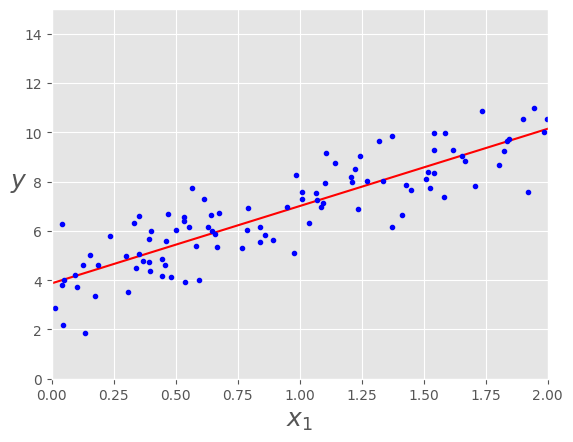

In [7]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])


# Gradient Descent

To explain in brief about gradient descent, imagine that you are on a mountain and are blindfolded and your task is to come down from the mountain to the flat land without assistance. The only assistance you have is a gadget which tells you the height from sea-level. What would be your approach be. You would start to descend in some random direction and then ask the gadget what is the height now. If the gadget tells you that height and it is more than the initial height then you know you started in wrong direction. You change the direction and repeat the process. This way in many iterations finally you successfully descend down.

Well here is the analogy with machine learning terms now:

    Size of Steps took in any direction = Learning rate

    Gadget tells you height = Cost function

    The direction of your steps = Gradients

## Cost Function & Gradients

<h4> The equation for calculating cost function and gradients are as shown below. Please note the cost function is for Linear regression. For other algorithms the cost function will be different and the gradients would have  to be derived from the cost functions



<b>Cost</b>
\begin{equation}
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
\end{equation}

<b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

<b>Gradients</b>
\begin{equation}
\theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)})
\end{equation}

\begin{equation}
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [8]:

def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost


In [9]:
# fonction de descente de gradient, ajout d'un parametre pour afficher par iter
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100,printiter=True):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    # vecteur contenant autant d'éléments que d'itérations avec la fonction de cout qui décroit
    cost_history = np.zeros(iterations)
    # vecteur 2D qui contient l'évolution des deux parametres 
    theta_history = np.zeros((iterations,2))
    
    # itérations
    for it in range(iterations):
        # on calcule la prédiction selon le vecteur de coef
        prediction = np.dot(X,theta)
        
        # actualisation des coef en fonction du learning rate et du gradient du param
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        # mise à jour de l'historique des coef
        theta_history[it,:] =theta.T
        # mise à jour de la fonction de cout
        cost_history[it]  = cal_cost(theta,X,y)
        if printiter==True:
            # on affiche itération, coef à deux dec et la fonction de cout
            if it<=5:
                print('itération :{}, vecteur des coef :{:0.2f}-{:0.2f}, fonction de perte: {:0.1f}'.format(it,theta[0][0],theta[1][0],cal_cost(theta,X,y)))
            else:
                if it%25==0:
                    print('dérivé du coef de x',(1/m)*learning_rate*( X.T.dot((prediction - y)))[1][0])
                    print('itération :{}, vecteur des coef :{:0.2f}-{:0.2f}, fonction de perte: {:0.1f}'.format(it,theta[0][0],theta[1][0],cal_cost(theta,X,y)))
                else:
                    pass
        
    return theta, cost_history, theta_history

    

<h3> Let's start with 1000 iterations and a learning rate of 0.01. Start with theta from a Gaussian distribution

In [10]:
lr =0.1
n_iter = 501

theta = np.random.randn(2,1)

# matrice X avec une constante
X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

itération :0, vecteur des coef :1.74-0.81, fonction de perte: 103910.0
itération :1, vecteur des coef :2.17-1.28, fonction de perte: 68436.7
itération :2, vecteur des coef :2.51-1.65, fonction de perte: 45691.5
itération :3, vecteur des coef :2.78-1.94, fonction de perte: 31107.6
itération :4, vecteur des coef :3.00-2.18, fonction de perte: 21756.5
itération :5, vecteur des coef :3.17-2.37, fonction de perte: 15760.7
dérivé du coef de x -0.0022779633060511697
itération :25, vecteur des coef :3.87-3.12, fonction de perte: 5047.7
dérivé du coef de x -3.984908654827435e-05
itération :50, vecteur des coef :3.87-3.13, fonction de perte: 5046.3
dérivé du coef de x -2.085076967030164e-05
itération :75, vecteur des coef :3.87-3.14, fonction de perte: 5046.3
dérivé du coef de x -1.388017124168972e-05
itération :100, vecteur des coef :3.87-3.14, fonction de perte: 5046.2
dérivé du coef de x -9.254540285676294e-06
itération :125, vecteur des coef :3.87-3.14, fonction de perte: 5046.2
dérivé du co

<h3> Let's plot the cost history over iterations

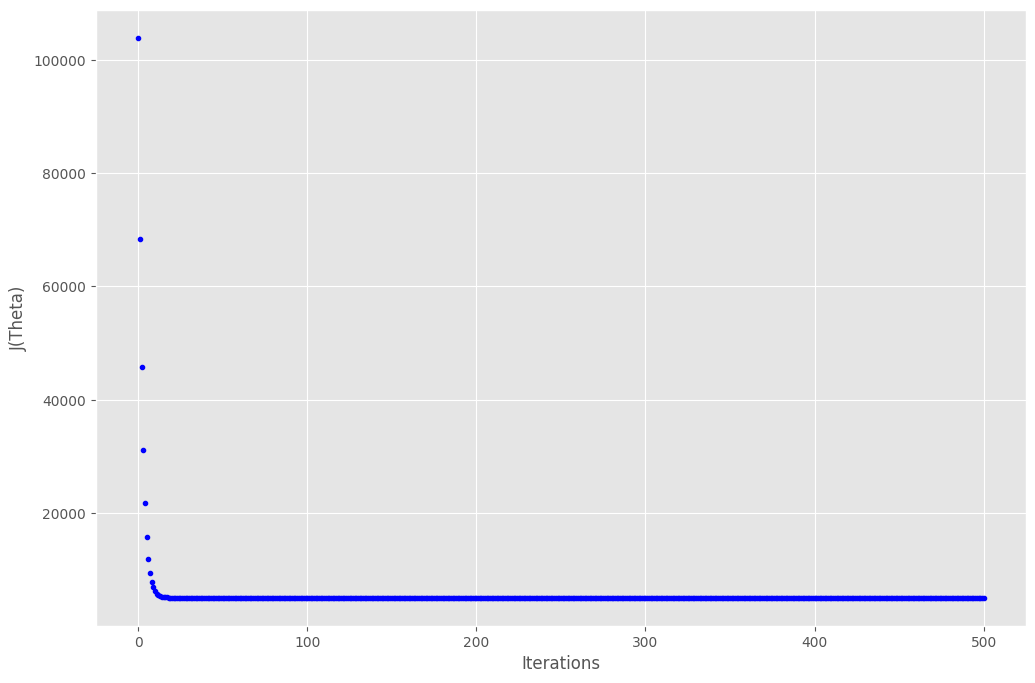

In [11]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

<h3> After around 150 iterations the cost is flat so the remaining iterations  are not needed or will not result in any further optimization. Let us zoom in till iteration 200 and see the curve

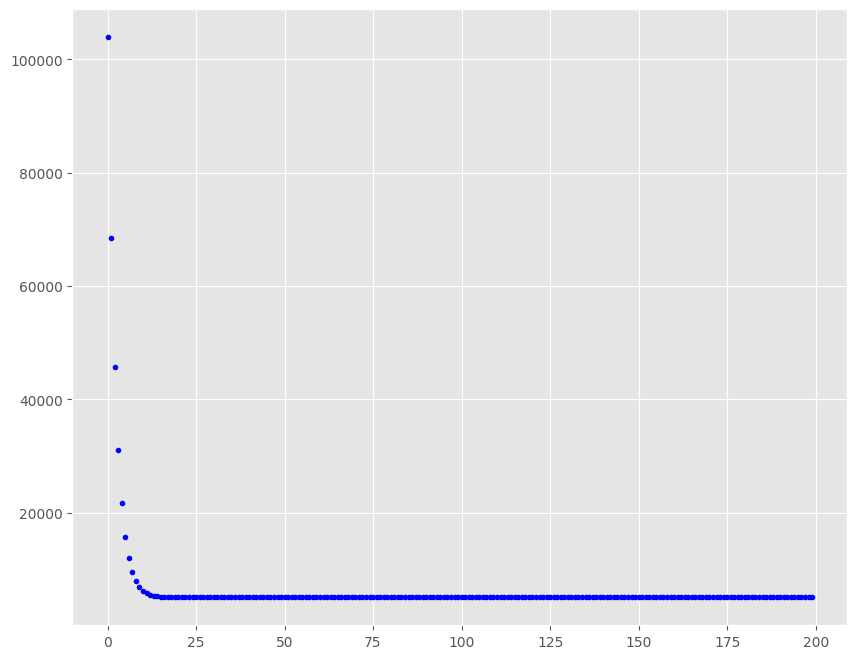

In [12]:

fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200),cost_history[:200],'b.')

<b>It is worth while to note that the cost drops faster initially and then the gain in cost reduction is not as much

### It would be great to see the effect of different learning rates and iterations together

### Let us  build a function which can show the effects together and also show how gradient decent actually is working

In [13]:

def plot_GD(n_iter,lr,ax,ax1=None):
     """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Axis to plot the Gradient Descent
     ax1 = Axis to plot cost_history vs Iterations plot

     """
     _ = ax.plot(X,y,'b.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')  

### Plot the graphs for different iterations and learning rates combination

itération :0, vecteur des coef :0.15-0.72, fonction de perte: 190081.5
itération :0, vecteur des coef :0.16-0.73, fonction de perte: 189348.4
itération :0, vecteur des coef :0.16-0.73, fonction de perte: 188618.3
itération :0, vecteur des coef :0.17-0.74, fonction de perte: 187891.0
itération :0, vecteur des coef :0.17-0.74, fonction de perte: 187166.7
itération :0, vecteur des coef :0.18-0.75, fonction de perte: 186445.2
itération :0, vecteur des coef :0.19-0.76, fonction de perte: 185726.6
itération :0, vecteur des coef :0.19-0.76, fonction de perte: 185010.9
itération :0, vecteur des coef :0.20-0.77, fonction de perte: 184298.0
itération :0, vecteur des coef :0.20-0.78, fonction de perte: 183587.9
itération :0, vecteur des coef :0.21-0.78, fonction de perte: 182880.7
itération :0, vecteur des coef :0.21-0.79, fonction de perte: 182176.3
itération :0, vecteur des coef :0.22-0.79, fonction de perte: 181474.7
itération :0, vecteur des coef :0.23-0.80, fonction de perte: 180775.9
itérat

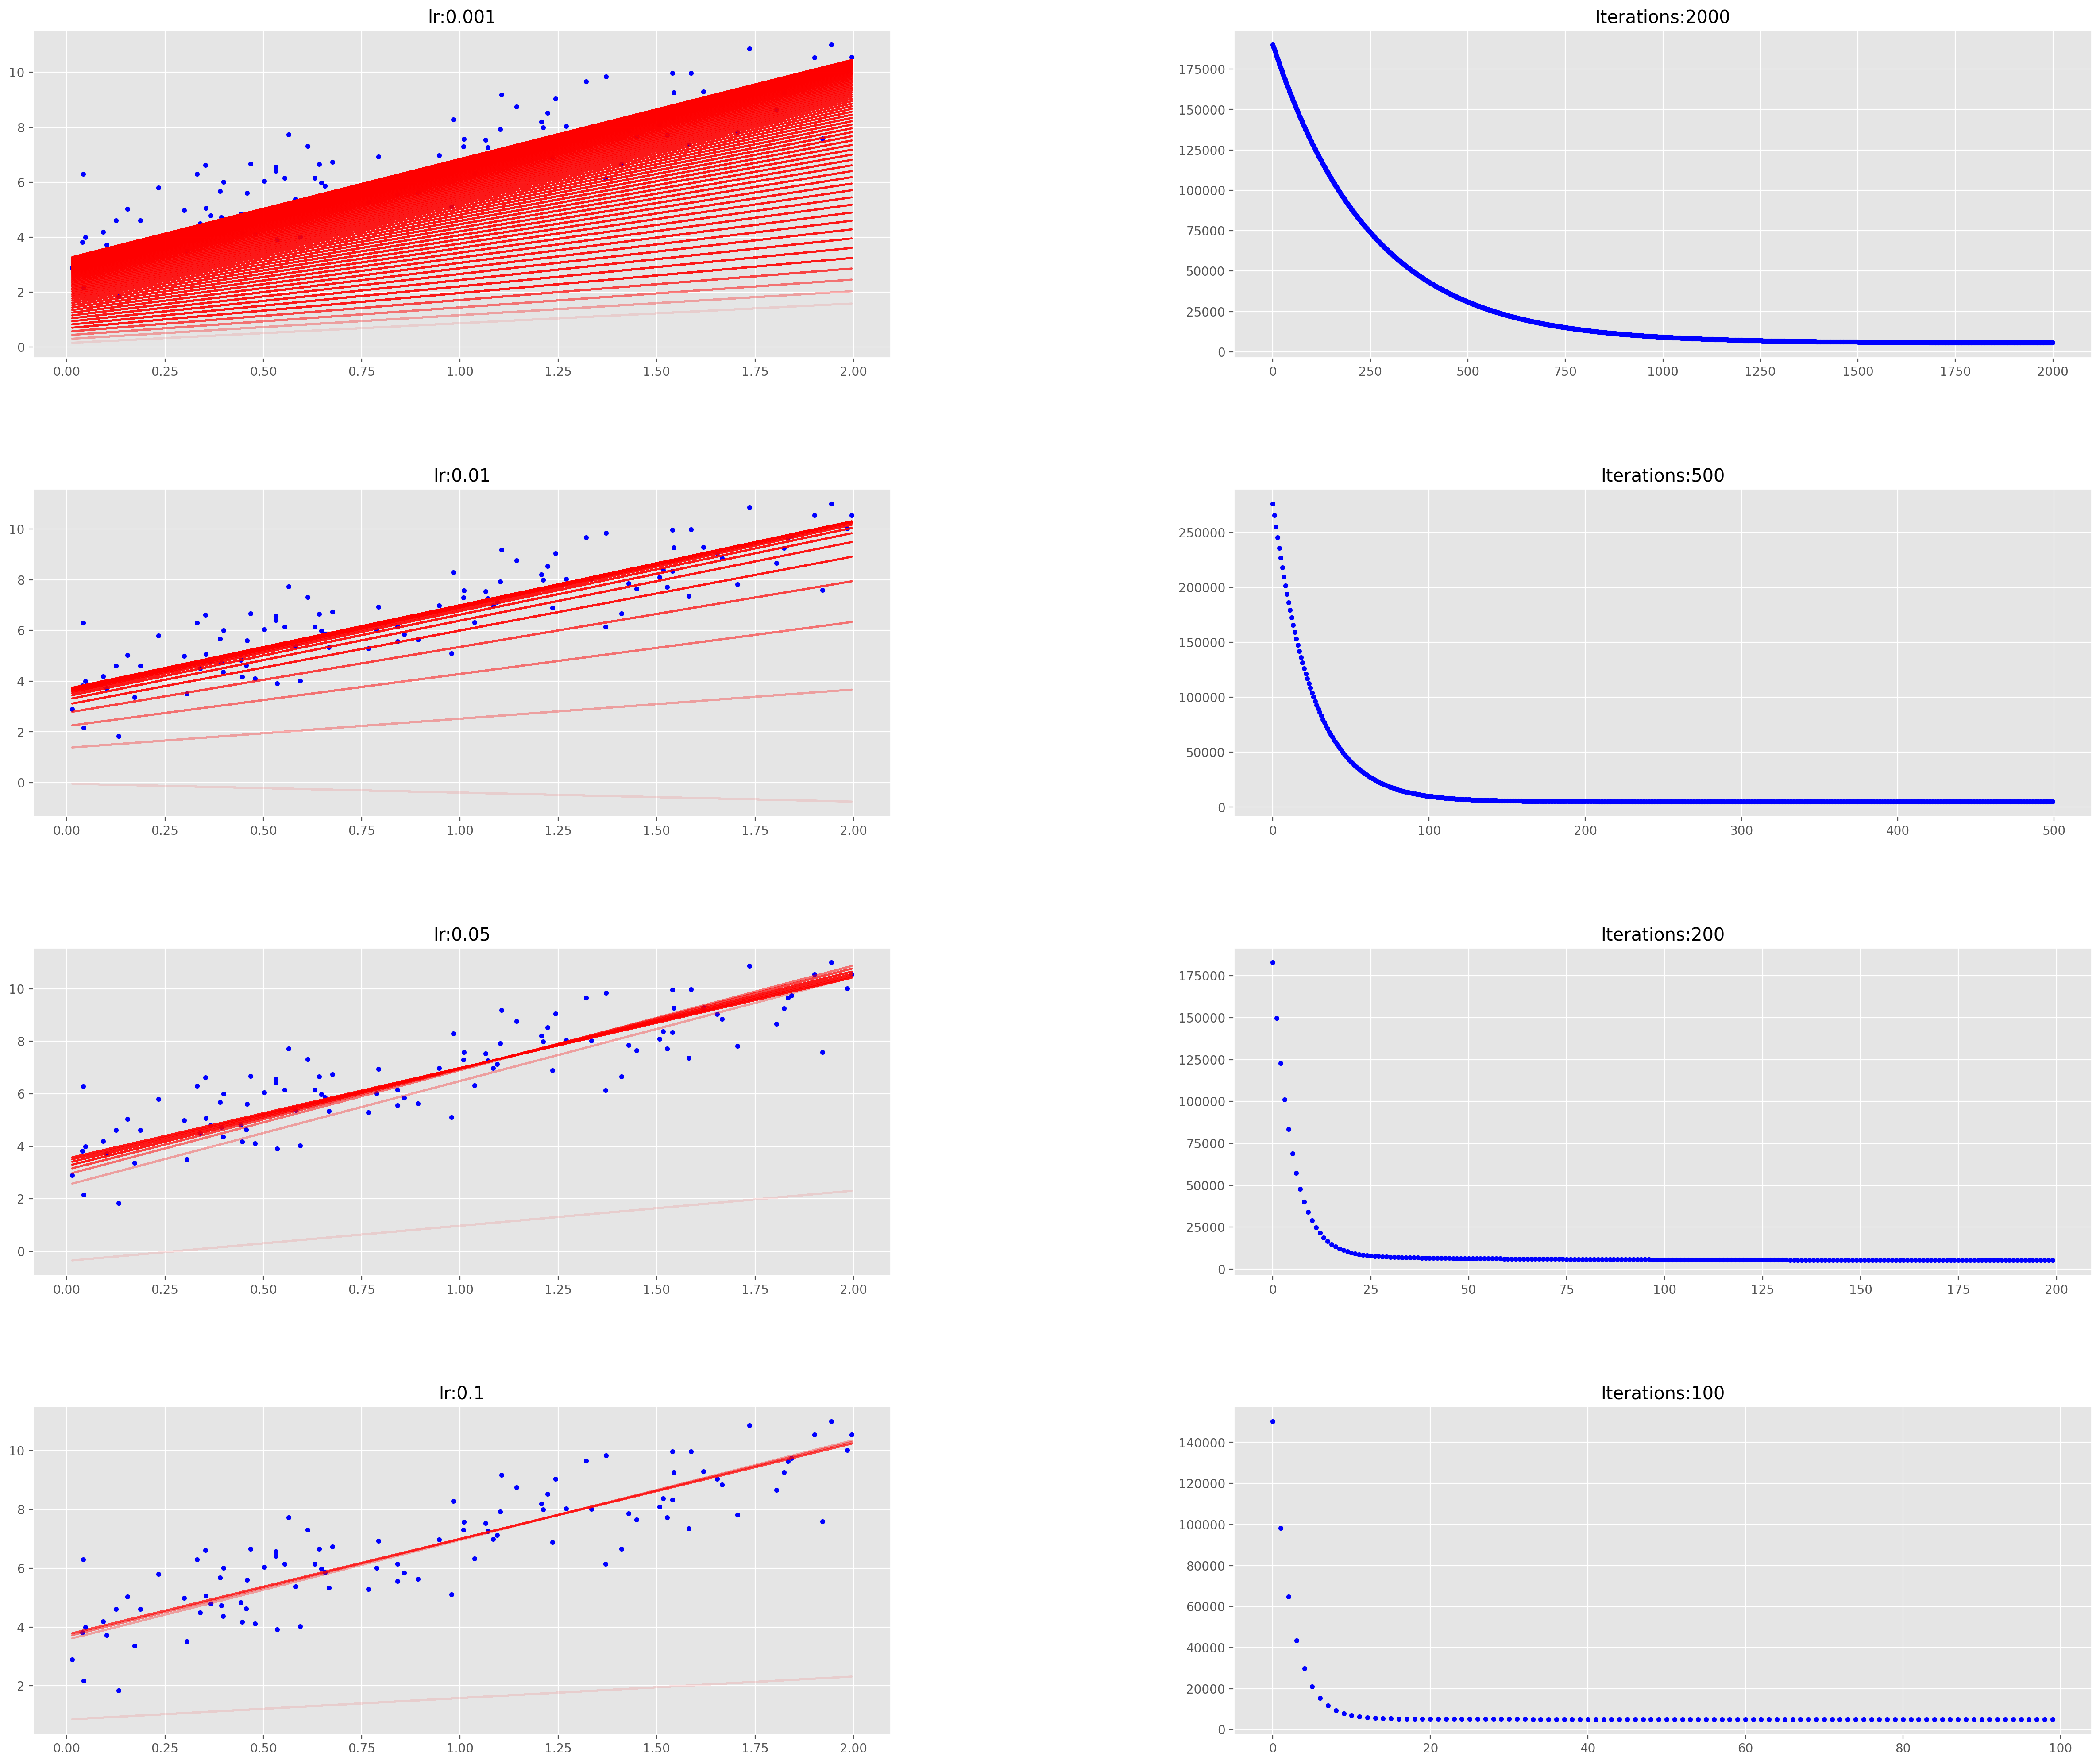

In [14]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)
    

<b> See how useful it is to visualize the effect of learning rates and iterations on gradient descent. The red lines show how the gradient descent starts and then slowly gets closer to the final value

## You can always plot Indiviual graphs to zoom in

itération :0, vecteur des coef :1.12--0.81, fonction de perte: 231493.1
itération :0, vecteur des coef :1.76--0.10, fonction de perte: 150351.0
itération :0, vecteur des coef :2.26-0.47, fonction de perte: 98320.0
itération :0, vecteur des coef :2.67-0.92, fonction de perte: 64954.9
itération :0, vecteur des coef :2.99-1.29, fonction de perte: 43558.3
itération :0, vecteur des coef :3.25-1.58, fonction de perte: 29835.9
itération :0, vecteur des coef :3.45-1.82, fonction de perte: 21034.1
itération :0, vecteur des coef :3.61-2.01, fonction de perte: 15387.5
itération :0, vecteur des coef :3.74-2.16, fonction de perte: 11764.1
itération :0, vecteur des coef :3.85-2.28, fonction de perte: 9438.1
itération :0, vecteur des coef :3.93-2.39, fonction de perte: 7943.9
itération :0, vecteur des coef :3.99-2.47, fonction de perte: 6983.3
itération :0, vecteur des coef :4.04-2.53, fonction de perte: 6364.8
itération :0, vecteur des coef :4.08-2.59, fonction de perte: 5965.8
itération :0, vecteur

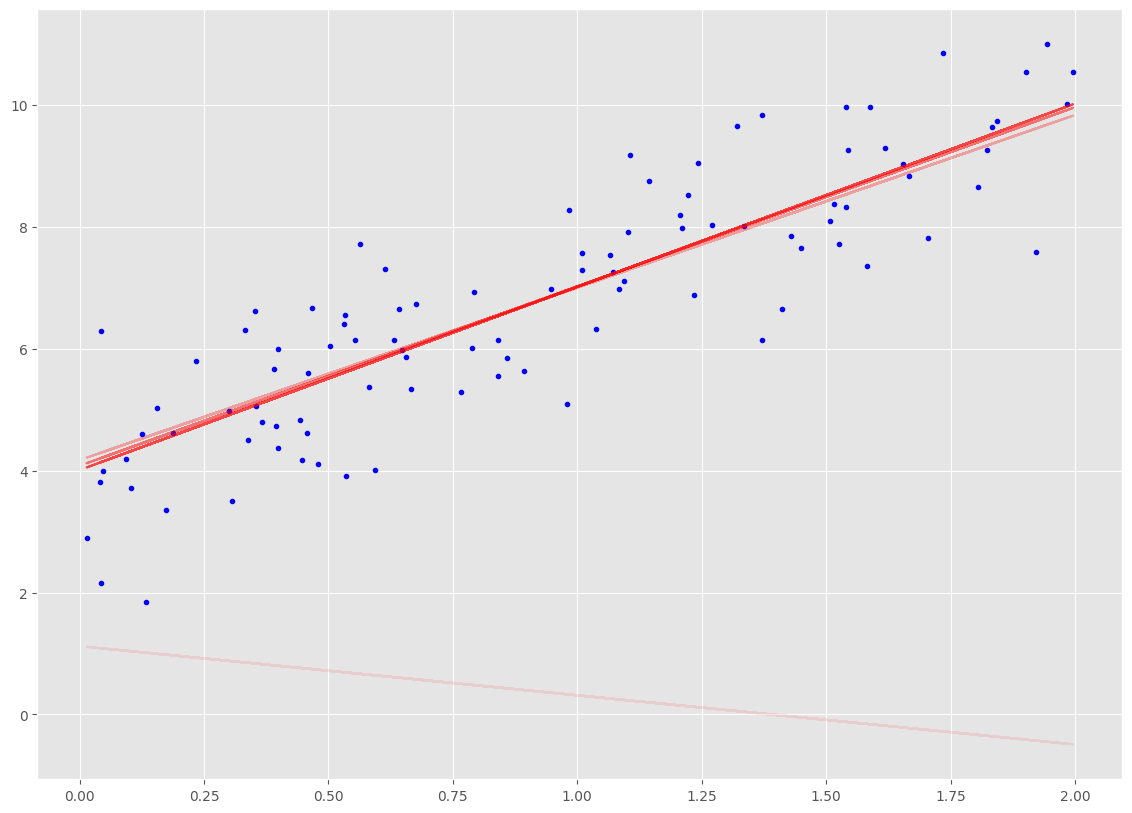

In [15]:
_,ax = plt.subplots(figsize=(14,10))
plot_GD(100,0.1,ax)

# Stochastic Gradient Descent

In [16]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        # on actualise par individu i et on passe tous les individus
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [17]:
lr =0.5
n_iter = 50

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.799,
Theta1:          3.101
Final cost/MSE:  47.200


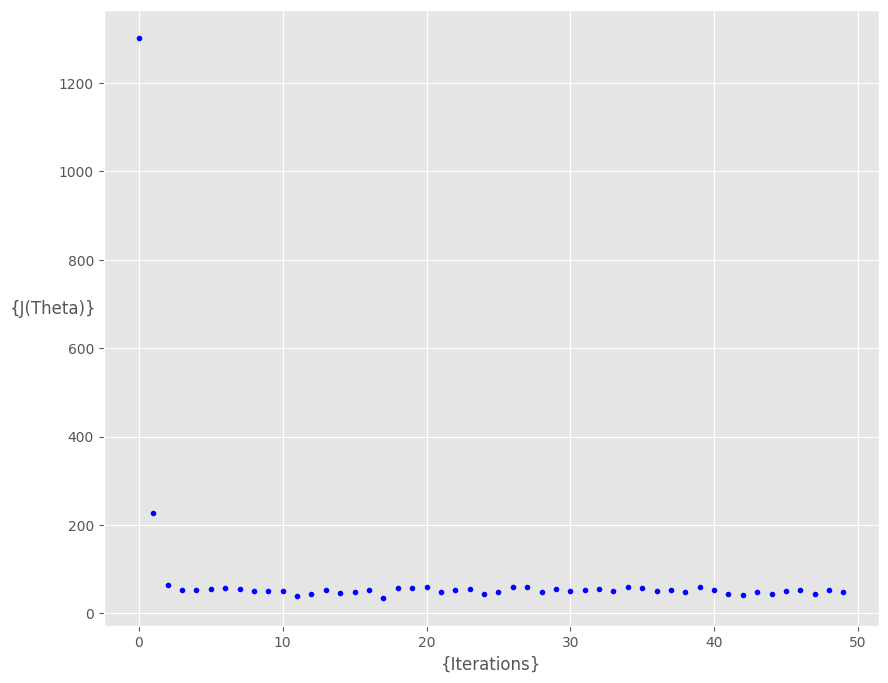

In [18]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

# Mini Batch Gradient Descent

In [19]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
         # on actualise par i paquet d'individu (batch size) et tout le paquet est utilisé pour actualiser l'estimation
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [20]:
lr =0.1
n_iter = 200

theta = np.random.randn(2,1)


theta,cost_history = minibatch_gradient_descent(X,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.812,
Theta1:          3.191
Final cost/MSE:  1008.055


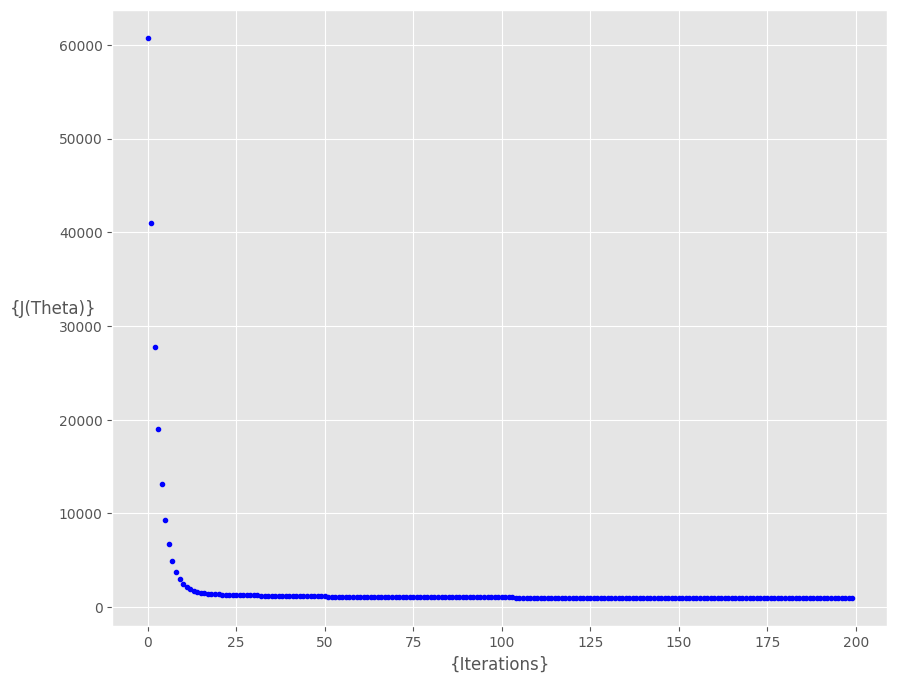

In [21]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')